# Candy task

# Import libraries

In [91]:
%pip install fuzzywuzzy
#Cleaning
import pandas as pd
import numpy as np
from fuzzywuzzy import process
from fuzzywuzzy import fuzz
#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('crest_r')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# My Figure Size

In [92]:
from matplotlib import rcParams            
rcParams['figure.figsize'] = (15,5)

# Remove Warning

In [93]:
import warnings
warnings.simplefilter("ignore")

# Reading the data

In [94]:
df = pd.read_excel('/content/candyhierarchy2017.xlsx')
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


# Data exploration

In [95]:
df.shape

(2460, 120)

In [96]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 120 columns):
 #    Column                                                                                 Non-Null Count  Dtype  
---   ------                                                                                 --------------  -----  
 0    Internal ID                                                                            2460 non-null   int64  
 1    Q1: GOING OUT?                                                                         2350 non-null   object 
 2    Q2: GENDER                                                                             2419 non-null   object 
 3    Q3: AGE                                                                                2376 non-null   object 
 4    Q4: COUNTRY                                                                            2396 non-null   object 
 5    Q5: STATE, PROVINCE, COUNTY, ETC                                   

In [97]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [98]:
pd.set_option('display.max_rows',None)
df.nunique()

Internal ID                                                                               2460
Q1: GOING OUT?                                                                               2
Q2: GENDER                                                                                   4
Q3: AGE                                                                                    106
Q4: COUNTRY                                                                                128
Q5: STATE, PROVINCE, COUNTY, ETC                                                           511
Q6 | 100 Grand Bar                                                                           3
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)       3
Q6 | Any full-sized candy bar                                                                3
Q6 | Black Jacks                                                                             3
Q6 | Bonkers (the candy)                          

# Data cleaning

In [99]:
df.duplicated().sum()

0

No duplicates to remove

In [100]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 113                                                                              2451
Q12: MEDIA [Yahoo]                                                                        2393
Q12: MEDIA [Daily Dish]                                                                   2375
Q12: MEDIA [ESPN]                                                                         2361
Q9: OTHER COMMENTS                                                                        2074
Q8: DESPAIR OTHER                                                                         1743
Q7: JOY OTHER                                                                             1549
Q12: MEDIA [Science]                                                                      1098
Q6 | JoyJoy (Mit Iodine!)                                                                 1026
Q6 | Maynards                                                                             1024
Q6 | Reggie Jackson Bar                           

WE have a lot of Nan :(

In [101]:
df.isnull().sum()/len(df)

Internal ID                                                                               0.000000
Q1: GOING OUT?                                                                            0.044715
Q2: GENDER                                                                                0.016667
Q3: AGE                                                                                   0.034146
Q4: COUNTRY                                                                               0.026016
Q5: STATE, PROVINCE, COUNTY, ETC                                                          0.040650
Q6 | 100 Grand Bar                                                                        0.303659
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    0.298374
Q6 | Any full-sized candy bar                                                             0.273171
Q6 | Black Jacks                                                                          0.389431
Q6 | Bonke

In [102]:
df.isnull().sum().sum()

96592

I will remove useless columns and coulmns have a lot of Nan

In [103]:
df=df.drop(['Click Coordinates (x, y)','Unnamed: 113','Internal ID'],axis=1)

In [104]:
df = df.rename(columns = {'Q1: GOING OUT?' : 'going out', 'Q2: GENDER' : 'gender', 'Q3: AGE': 'age', 'Q4: COUNTRY' : 'country','Q5: STATE, PROVINCE, COUNTY, ETC':'state','Q10: DRESS' : 'dress', 'Q11: DAY': 'day','Q12: MEDIA [Daily Dish]':'Daily Dish','Q12: MEDIA [Science]':'Science','Q12: MEDIA [ESPN]':'ESPN','Q12: MEDIA [Yahoo]':'Yahoo'})

Showing total number of NaN values Now

In [105]:
df.isnull().sum().sum()

93286

In [106]:
df.shape

(2460, 117)

In [107]:
pd.reset_option('display.max_rows',None)
pd.reset_option('display.max_columns',None)

### **Cleaning going out column**

In [108]:
df['going out'].value_counts()

No     2038
Yes     312
Name: going out, dtype: int64

In [109]:
df['going out'].isna().sum()

110

In [110]:
df['going out'] = df['going out'].fillna("Maybe")

In [111]:
df['going out'].value_counts()

No       2038
Yes       312
Maybe     110
Name: going out, dtype: int64

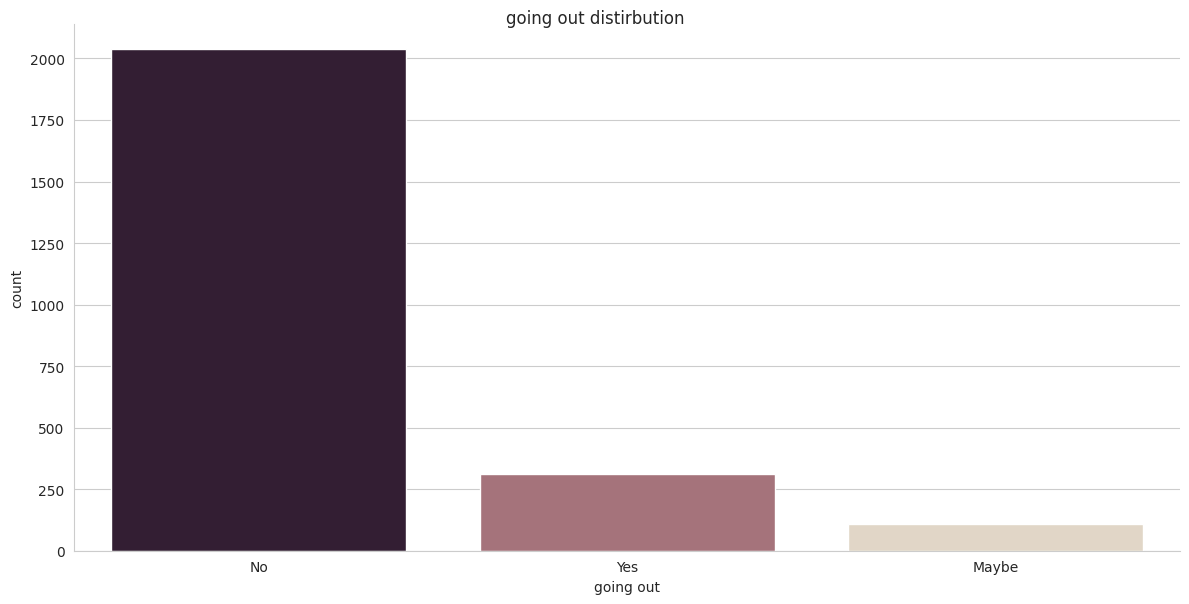

In [112]:
g=sns.catplot(x="going out",data=df,kind="count",palette="ch:.25_r", height=6, aspect=2,order = df['going out'].value_counts().index)
g.fig.suptitle("going out distirbution",y=1)
plt.show()

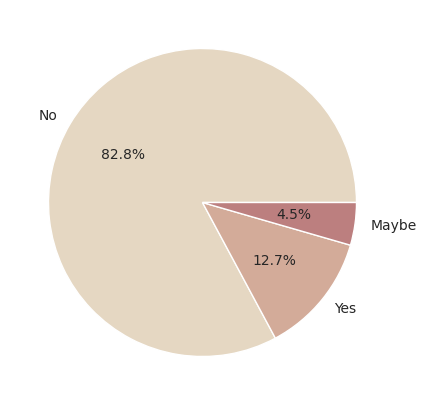

In [113]:
plt.pie(df['going out'].value_counts(), labels = ['No','Yes','Maybe'], colors = sns.color_palette("ch:.25"), autopct = '%1.1f%%')
pass

Most people are not going

### **Cleaning gender column**

In [114]:
df['gender'].value_counts()

Male                  1467
Female                 839
I'd rather not say      83
Other                   30
Name: gender, dtype: int64

In [115]:
df['gender'].isna().sum()

41

In [116]:
df['gender'] = df['gender'].fillna("I'd rather not say")

In [117]:
df['gender'] = df['gender'].replace("Other","I'd rather not say")

In [118]:
df.gender.value_counts()

Male                  1467
Female                 839
I'd rather not say     154
Name: gender, dtype: int64

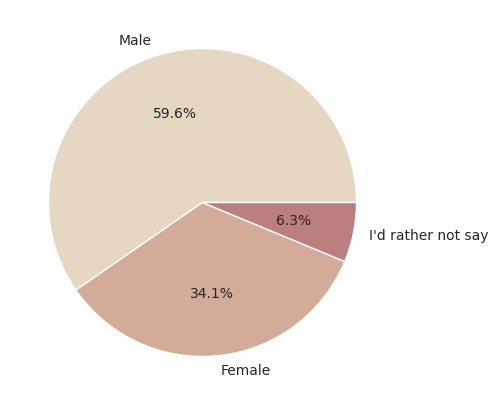

In [119]:
plt.pie(df['gender'].value_counts(), labels = ['Male','Female',"I'd rather not say"], colors = sns.color_palette("ch:.25"), autopct = '%1.1f%%')
pass

Male is the most common gender

### **Cleaning age column**

In [120]:
df['age'].isna().sum()

84

In [121]:
print(df['age'].unique())

[nan 44 49 40 23 53 33 43 56 64 37 59 48 54 36 45 25 34 35 38 58 50 47 16
 52 63 65 41 27 31 61 46 42 62 29 39 32 28 69 67 30 22 26 51 70 24 18 19
 'Old enough' 57 60 66 12 'Many' 55 72 '?' 21 11 'no' 9 68 20 6 10 71 90
 13 '45-55' 312 99 7 'hahahahaha' 88 39.4 74 102 'older than dirt' 17 15 8
 75 '5u' 'Enough' 'See question 2' '24-50' 14 'Over 50' 100 76 1000
 'sixty-nine' '46 Halloweens.' 'ancient' 77 'OLD' 'old' 73 70.5 1
 'MY NAME JEFF' 4 '59 on the day after Halloween' 'old enough' 'your mom'
 'I can remember when Java was a cool new language' '60+']


In [122]:
df['age']=pd.to_numeric(df['age'],errors='coerce')

In [123]:
print(df['age'].unique())

[   nan   44.    49.    40.    23.    53.    33.    43.    56.    64.
   37.    59.    48.    54.    36.    45.    25.    34.    35.    38.
   58.    50.    47.    16.    52.    63.    65.    41.    27.    31.
   61.    46.    42.    62.    29.    39.    32.    28.    69.    67.
   30.    22.    26.    51.    70.    24.    18.    19.    57.    60.
   66.    12.    55.    72.    21.    11.     9.    68.    20.     6.
   10.    71.    90.    13.   312.    99.     7.    88.    39.4   74.
  102.    17.    15.     8.    75.    14.   100.    76.  1000.    77.
   73.    70.5    1.     4. ]


In [124]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
print(upper_bound,lower_bound)

74.0 10.0


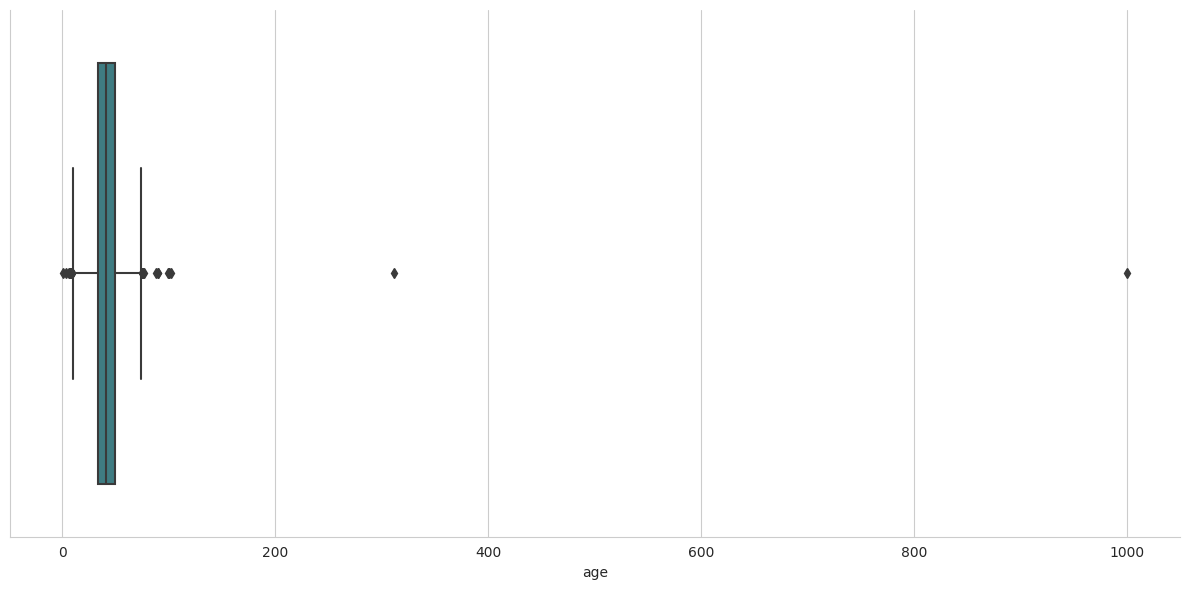

In [125]:
g = sns.catplot(x='age',data=df,kind="box",palette="crest_r", height=6, aspect=2)
plt.show()

Remove outliers in the 'Age' column

In [126]:
df['age'].describe()

count    2352.000000
mean       42.617304
std        23.846531
min         1.000000
25%        34.000000
50%        41.000000
75%        50.000000
max      1000.000000
Name: age, dtype: float64

In [127]:
for i in df['age']:
    if(i>70 or i<15):
        df['age']=df['age'].replace(i,np.nan)   

In [128]:
print(df['age'].unique())

[ nan 44.  49.  40.  23.  53.  33.  43.  56.  64.  37.  59.  48.  54.
 36.  45.  25.  34.  35.  38.  58.  50.  47.  16.  52.  63.  65.  41.
 27.  31.  61.  46.  42.  62.  29.  39.  32.  28.  69.  67.  30.  22.
 26.  51.  70.  24.  18.  19.  57.  60.  66.  55.  21.  68.  20.  39.4
 17.  15. ]


In [129]:
df['age'].astype(float)

0        NaN
1       44.0
2       49.0
3       40.0
4       23.0
        ... 
2455    24.0
2456    33.0
2457    26.0
2458    58.0
2459    66.0
Name: age, Length: 2460, dtype: float64

In [130]:
df['age'] = df['age'].fillna(df['age'].mean())

In [131]:
df['age']=df['age'].astype(int)

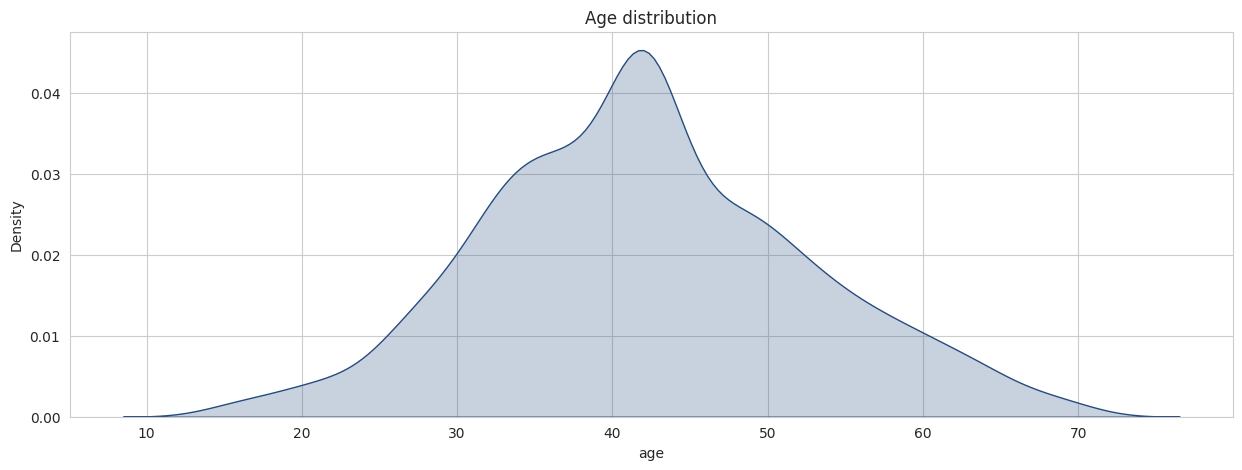

In [132]:
g=sns.kdeplot(data = df, x = 'age', shade = True,palette="ch:.25")
plt.title('Age distribution')
plt.show()

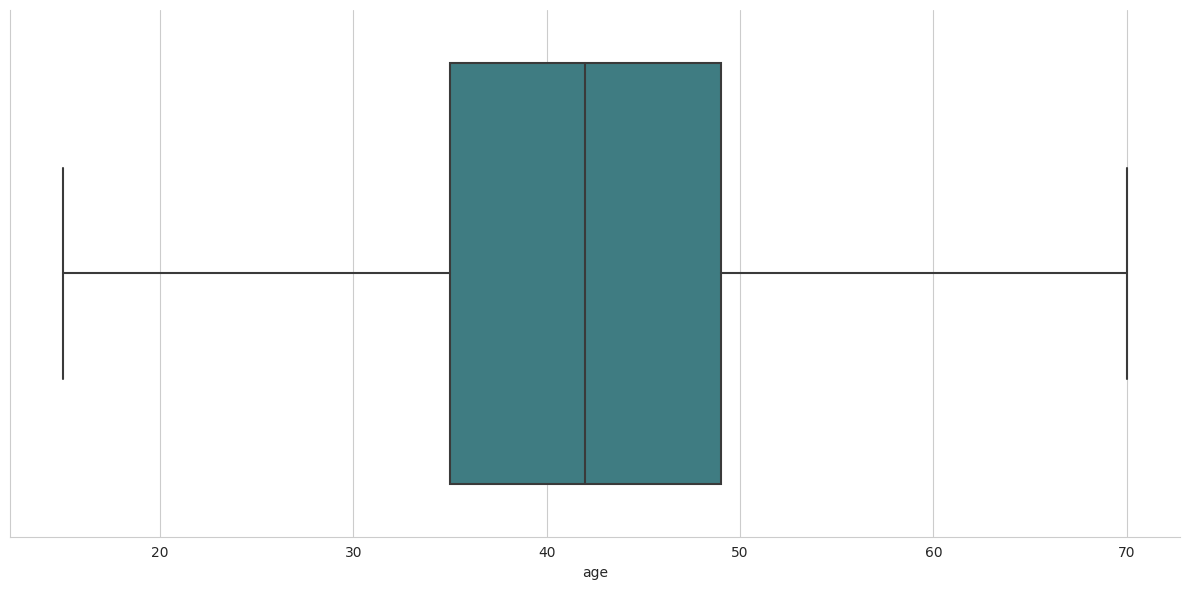

In [133]:
g = sns.catplot(x='age',data=df,kind="box",palette="crest_r", height=6, aspect=2)
plt.show()

In [134]:
df['age'].describe()

count    2460.000000
mean       42.139024
std        10.371710
min        15.000000
25%        35.000000
50%        42.000000
75%        49.000000
max        70.000000
Name: age, dtype: float64

Most people who did the survey were between 35 and 50

### **Cleaning dress column**

In [135]:
df['dress'].value_counts()

White and gold    1081
Blue and black     635
Name: dress, dtype: int64

In [136]:
df['dress'].isna().sum()

744

In [137]:
df['dress'] = df['dress'].fillna("Other Colors")

In [138]:
df['dress'].value_counts()

White and gold    1081
Other Colors       744
Blue and black     635
Name: dress, dtype: int64

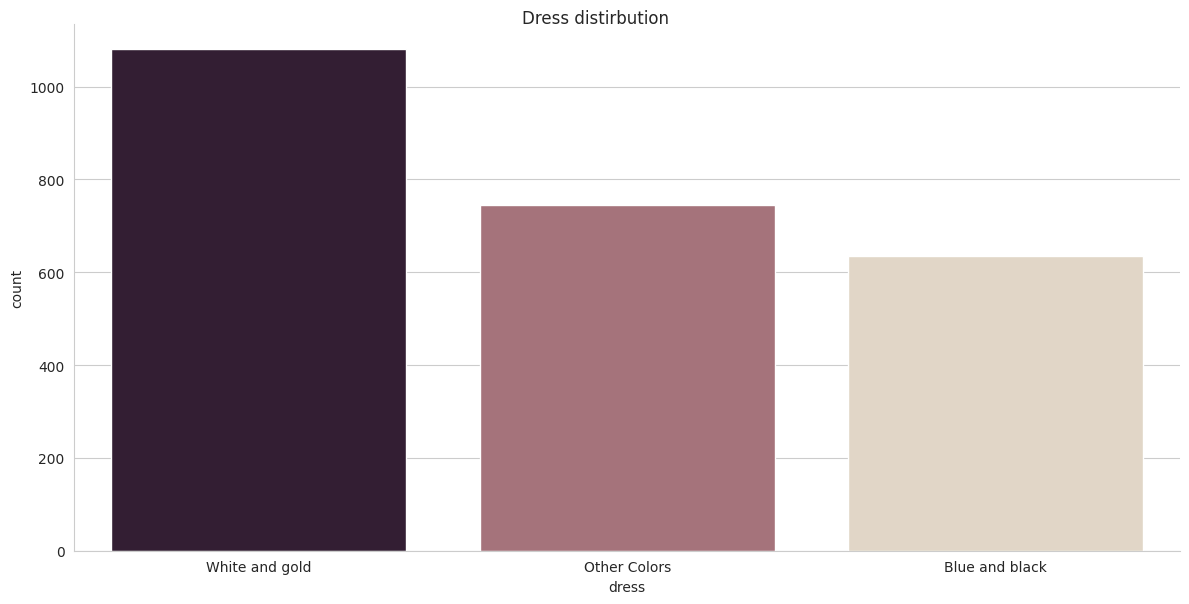

In [139]:
g=sns.catplot(x="dress",data=df,kind="count",palette="ch:.25_r", height=6, aspect=2,order = df['dress'].value_counts().index)
g.fig.suptitle("Dress distirbution",y=1)
plt.show()

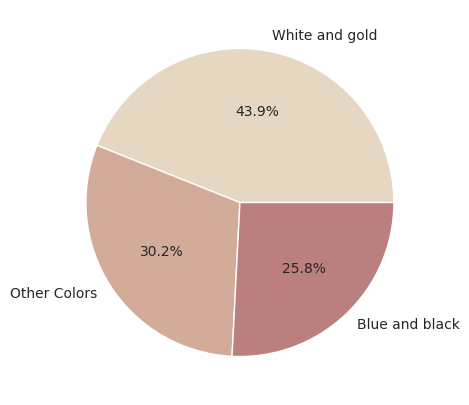

In [140]:
plt.pie(df['dress'].value_counts(), labels = ['White and gold','Other Colors','Blue and black'], colors = sns.color_palette("ch:.25"), autopct = '%1.1f%%')
pass

Most people saw the dress white and gold

### **Cleaning day column**

In [141]:
df['day'].value_counts()

Friday    1091
Sunday     644
Name: day, dtype: int64

In [142]:
df['day'].isna().sum()

725

In [143]:
df['day'] = df['day'].fillna("Other")

In [144]:
df['day'].value_counts()

Friday    1091
Other      725
Sunday     644
Name: day, dtype: int64

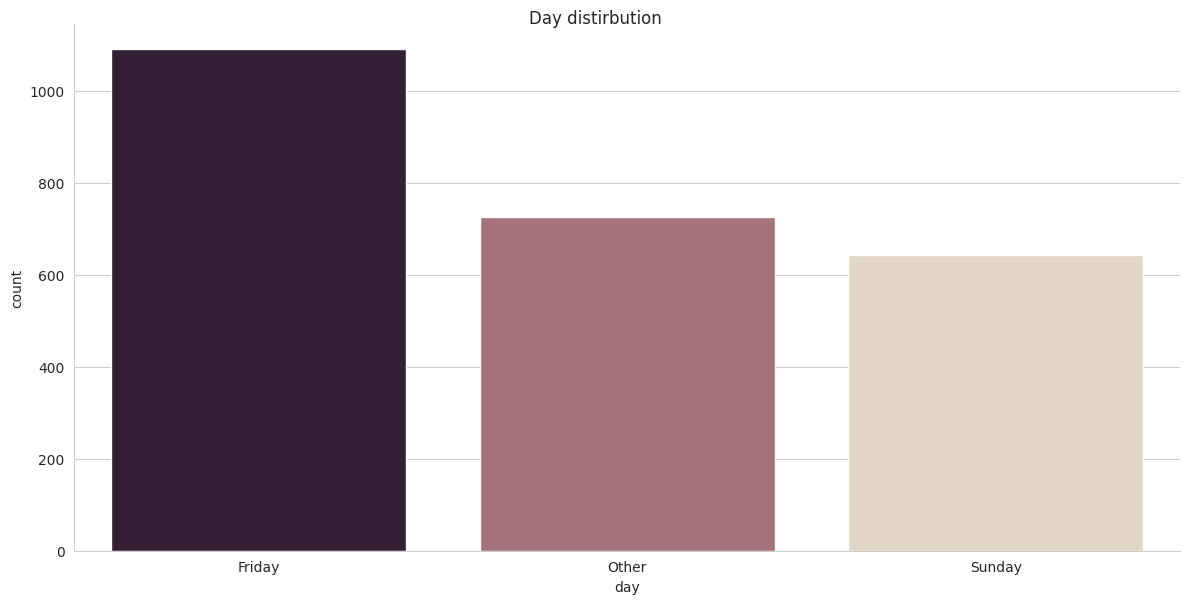

In [145]:
g=sns.catplot(x="day",data=df,kind="count",palette="ch:.25_r", height=6, aspect=2,order = df['day'].value_counts().index)
g.fig.suptitle("Day distirbution",y=1)
plt.show()

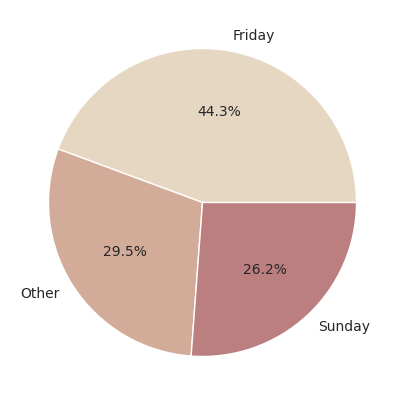

In [146]:
plt.pie(df['day'].value_counts(), labels = ['Friday','Other','Sunday'], colors = sns.color_palette("ch:.25"), autopct = '%1.1f%%')
pass

Most preferred day is friday

### **Cleaning country column**

In [147]:
df['country'].isnull().sum()

64

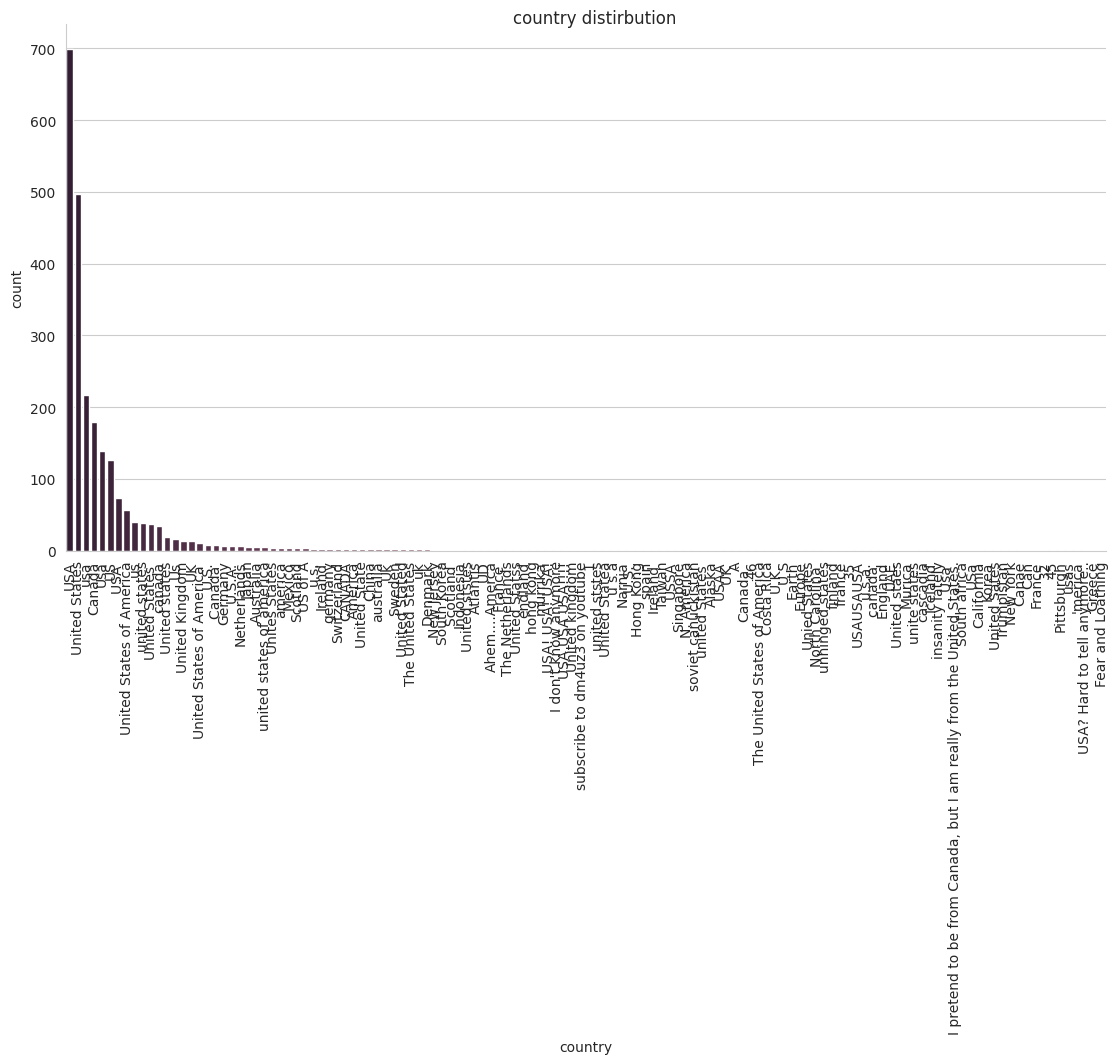

In [148]:
g=sns.catplot(x="country",data=df,kind="count",palette="ch:.25_r",order = df['country'].value_counts().index, height=6, aspect=2)
g.fig.suptitle("country distirbution",y=1)
plt.xticks(rotation=90)
plt.show()

In [149]:
df['country'] = df['country'].fillna("Other")

In [150]:
print(df['country'].unique())

['Other' 'USA ' 'USA' 'us' 'usa' 'canada' 'Canada' 'Us' 'US' 'Murica'
 'United States' 'uk' 'United Kingdom' 'united states' 'Usa'
 'United States ' 'United staes' 'United States of America' 'UAE'
 'England' 'UK' 'canada ' 'Mexico' 'United states' 'u.s.a.' 'USAUSAUSA'
 'america' 35 'france' 'United States of America ' 'U.S.A.' 'finland'
 'unhinged states' 'Canada ' 'united states of america' 'US of A'
 'Unites States' 'The United States' 'North Carolina ' 'Unied States'
 'Netherlands' 'germany' 'Europe' 'Earth' 'U S' 'u.s.' 'U.K. '
 'Costa Rica' 'The United States of America' 'unite states' 'U.S.' 46
 'cascadia' 'Australia' 'insanity lately' 'Greece'
 'USA? Hard to tell anymore..' "'merica" 'usas' 'Pittsburgh' 45
 'United State' 32 'France' 'australia' 'A' 'Can' 'Canae' 'New York'
 'Trumpistan' 'Ireland' 'United Sates' 'Korea' 'California' 'Japan' 'USa'
 'South africa'
 'I pretend to be from Canada, but I am really from the United States.'
 'Usa ' 'Uk' 'Iceland' 'Germany' 'Canada`' 'Sc

In [151]:
df['country'].value_counts()

USA                  699
United States        497
usa                  217
Canada               179
Usa                  139
                    ... 
United Sates           1
unhinged states        1
Trumpistan             1
New York               1
Fear and Loathing      1
Name: country, Length: 129, dtype: int64

In [152]:
countries=['USA','United States','Canada','America','UK','United Kingdom']

In [153]:
for choice in countries:
    matches = process.extract(choice, df['country'], limit = df.shape[0])
    for matching in matches:
        if matching[1] >= 85:
            df.loc[df['country'] == matching[0], 'country'] = choice

In [154]:
df['country'].value_counts()

USA                  1319
United States         699
Canada                226
Other                  64
UK                     18
                     ... 
Canae                   1
New York                1
Korea                   1
California              1
Fear and Loathing       1
Name: country, Length: 75, dtype: int64

In [155]:
df['country'].unique()

array(['Other', 'USA', 'Canada', 'Murica', 'United States', 'UK',
       'United Kingdom', 'UAE', 'England', 'Mexico', 'u.s.a.', 'America',
       35, 'france', 'U.S.A.', 'finland', 'US of A', 'North Carolina ',
       'Netherlands', 'germany', 'Europe', 'Earth', 'U.K. ', 'Costa Rica',
       46, 'cascadia', 'Australia', 'insanity lately', 'Greece',
       'USA? Hard to tell anymore..', 'Pittsburgh', 45, 32, 'France',
       'australia', 'Canae', 'New York', 'Trumpistan', 'Ireland', 'Korea',
       'California', 'Japan', 'South africa', 'Iceland', 'Germany',
       'Scotland', 'Denmark', 'France ', 'Switzerland', 'Ahem....Amerca',
       'UD', 'Scotland ', 'South Korea', 'New Jersey', 'Indonesia',
       'The Netherlands', 'endland', 'Atlantis', 'murrika', 'Alaska',
       'soviet canuckistan', 'Singapore', 'China', 'Taiwan', 'Ireland ',
       'hong kong', 'spain', 'Sweden', 'Hong Kong', 'Narnia', 'u s a', 1,
       'subscribe to dm4uz3 on youtube', "I don't know anymore",
       'Fea

In [156]:
for x in df['country']:
    if ((('U' in str(x) and 'S' in str (x)))):
        df['country']=df['country'].replace(x,"USA")

In [157]:
df['country']=df['country'].replace(['Ahem....Amerca','u s a','Alaska','New Jersey','California','US of A', 'North Carolina ','United States','America','New York','u.s.a.','CALIFORNIA','NEW JERSEY','U.S.A.','US OF A','U S A'],'USA')
df['country']=df['country'].replace(['France','U.K. ','endland','England','United Kingdom','ENGLAND','ENDLAND'],'UK')
df['country']=df['country'].replace(['Netherlands','germany','Iceland', 'France ', 'Scotland ','Ireland ','Greece','france', 'finland', 'Europe','Scotland','Ireland','Switzerland','Sweden','Denmark','spain','The Netherlands','Scotland'],'Other european countries')
df['country']=df['country'].replace(['australia'],'Australia')
df['country']=df['country'].replace(['Japan','UAE','hong kong','China','Hong Kong','Indonesia','South Korea','Singapore','Korea','Taiwan''UAE',],'Other asian countries')
df['country'].value_counts()

USA                               2046
Canada                             226
Other                               64
UK                                  36
Other european countries            33
Other asian countries               14
Australia                            7
Germany                              7
Mexico                               4
subscribe to dm4uz3 on youtube       1
South africa                         1
Narnia                               1
Taiwan                               1
soviet canuckistan                   1
murrika                              1
Atlantis                             1
I don't know anymore                 1
UD                                   1
1                                    1
45                                   1
Trumpistan                           1
Canae                                1
32                                   1
Pittsburgh                           1
insanity lately                      1
cascadia                 

In [158]:
other = [x for x in df['country'].unique()]
other.remove('USA')
other.remove('Canada')
other.remove('UK')
other.remove('Other european countries')
other.remove('Other asian countries')
other.remove('Australia')
print(other)

['Other', 'Murica', 'Mexico', 35, 'Earth', 'Costa Rica', 46, 'cascadia', 'insanity lately', 'Pittsburgh', 45, 32, 'Canae', 'Trumpistan', 'South africa', 'Germany', 'UD', 'Atlantis', 'murrika', 'soviet canuckistan', 'Taiwan', 'Narnia', 1, 'subscribe to dm4uz3 on youtube', "I don't know anymore", 'Fear and Loathing']


In [159]:
df['country']=df['country'].replace(other,'Other')

In [160]:
df['country'].value_counts()

USA                         2046
Canada                       226
Other                         98
UK                            36
Other european countries      33
Other asian countries         14
Australia                      7
Name: country, dtype: int64

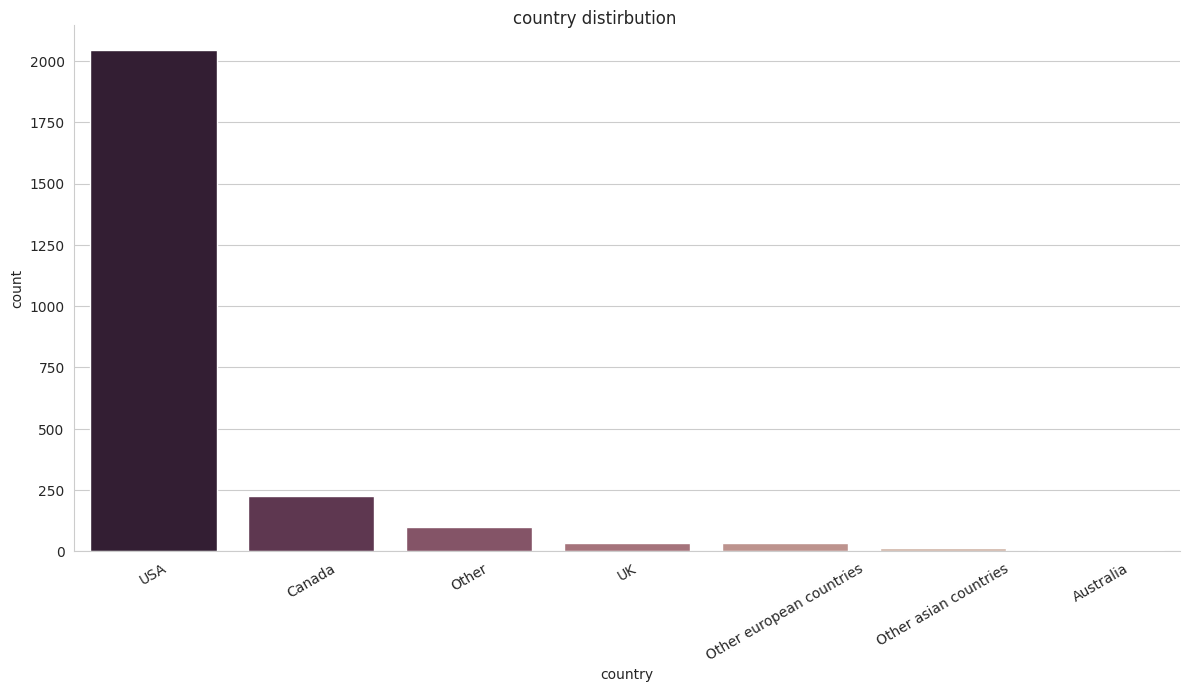

In [161]:
g=sns.catplot(x="country",data=df,kind="count",palette="ch:.25_r",order = df['country'].value_counts().index, height=6, aspect=2)
g.fig.suptitle("country distirbution",y=1)
plt.xticks(rotation=30)
plt.show()

The majority are from USA and Canda

### **Cleaning state columns**

In [162]:
df['state'].value_counts()

California           132
CA                    89
Texas                 60
Ontario               56
Illinois              55
                    ... 
COLORADO               1
colorado, boulder      1
New Orleans la         1
Ky                     1
québec                 1
Name: state, Length: 511, dtype: int64

In [163]:
df['state'].nunique()

511

In [164]:
df['state'].isnull().sum()

100

I will drop this column , because we have too much unique values and we can not get useful info from it.

In [165]:
df=df.drop(['state'],axis=1)

### **Cleaning Media columns**

In [166]:
def func(row):
    for c in media.columns:
        if row[c] == 1:
            return c

In [167]:
media = df[df.columns[-4:]]
media

,Daily Dish,Science,ESPN,Yahoo
0,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN
4,NaN,1.0,NaN,NaN
...,...,...,...,...
2455,NaN,NaN,NaN,NaN
2456,NaN,1.0,NaN,NaN
2457,NaN,1.0,NaN,NaN
2458,NaN,NaN,NaN,NaN


In [168]:
new_col = media.apply(func, axis = 1)

In [169]:
df['media'] = new_col

In [170]:
df.drop(columns = ['Daily Dish','Science','ESPN','Yahoo'],inplace=True)

In [171]:
df['media'] = df['media'].fillna("No answer")

In [172]:
df['media'].value_counts(dropna = False)

Science       1362
No answer      847
ESPN            99
Daily Dish      85
Yahoo           67
Name: media, dtype: int64

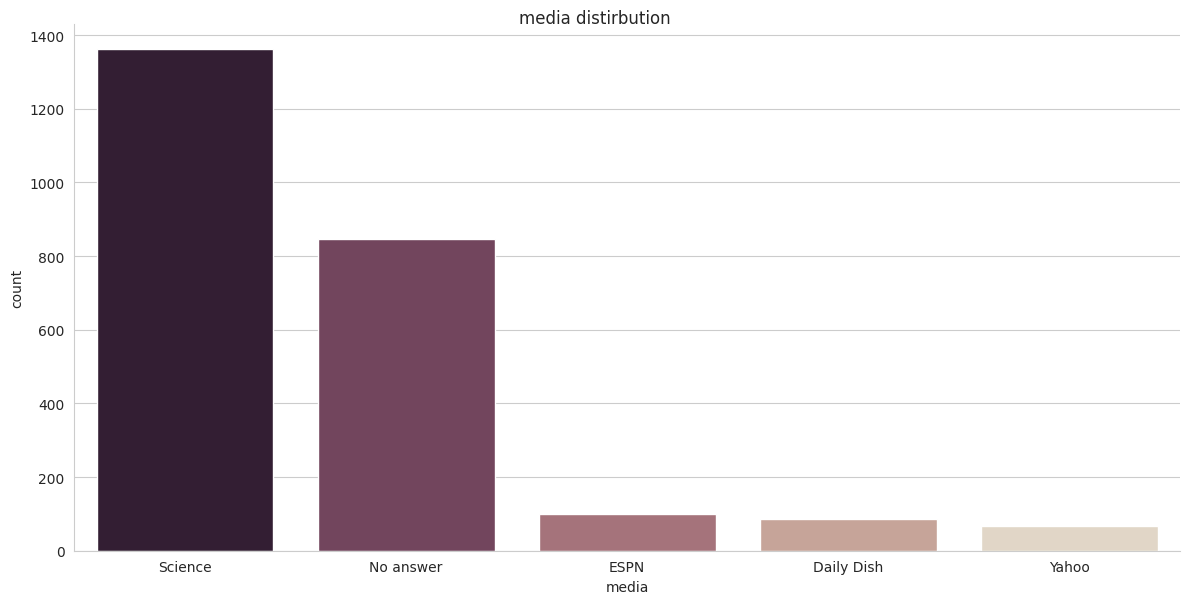

In [173]:
g=sns.catplot(x="media",data=df,kind="count",palette="ch:.25_r",order = df['media'].value_counts().index, height=6, aspect=2)
g.fig.suptitle("media distirbution",y=1)
plt.show()

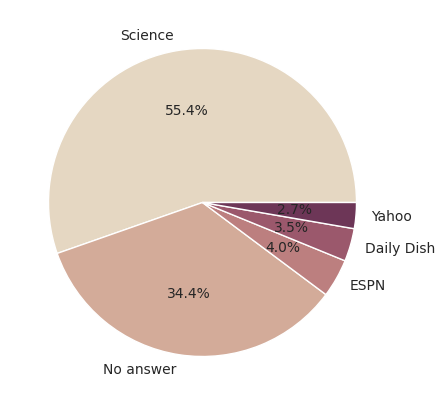

In [174]:
plt.pie(df['media'].value_counts(), labels = ['Science','No answer','ESPN','Daily Dish','Yahoo'], colors = sns.color_palette("ch:.25"), autopct = '%1.1f%%')
pass

Science is the most likely website to be checked out

# **Other**

In [175]:
df['Q9: OTHER COMMENTS'] = df['Q9: OTHER COMMENTS'].replace(['candy','Candy'],['',''])

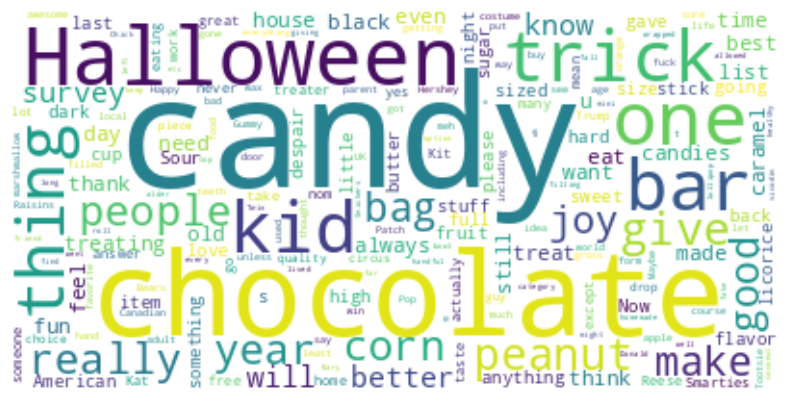

In [176]:
col = df['Q9: OTHER COMMENTS'].dropna()
text = " ".join(cat for cat in col)

word_cloud = WordCloud(collocations= False, background_color='white').generate(text)

plt.axis("off")
plt.imshow(word_cloud, interpolation= 'bilinear')
plt.show()

In [177]:
df['Q7: JOY OTHER'] = df['Q7: JOY OTHER'].replace(['candy','Candy'],['',''])

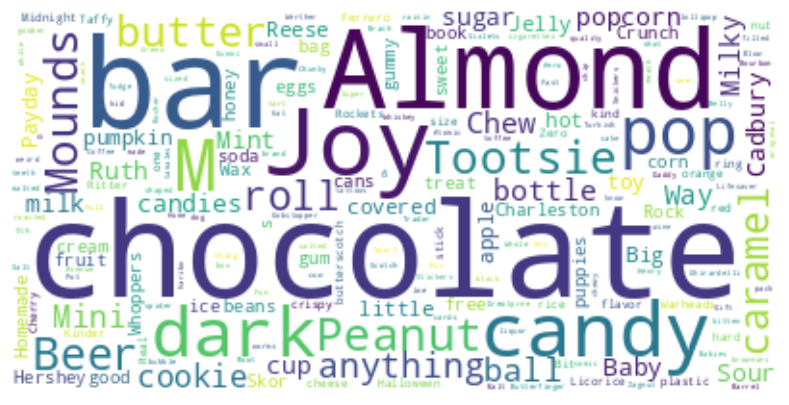

In [178]:
col = df['Q7: JOY OTHER'].dropna()
text = " ".join(cat for cat in col)

word_cloud = WordCloud(collocations= False, background_color='white').generate(text)

plt.axis("off")
plt.imshow(word_cloud, interpolation= 'bilinear')
plt.show()

In [179]:
df['Q8: DESPAIR OTHER'] = df['Q8: DESPAIR OTHER'].replace(['nan','candy','Candy','anything'],['','','',''])

In [180]:
df['Q8: DESPAIR OTHER'] = df['Q8: DESPAIR OTHER'].astype('str') 

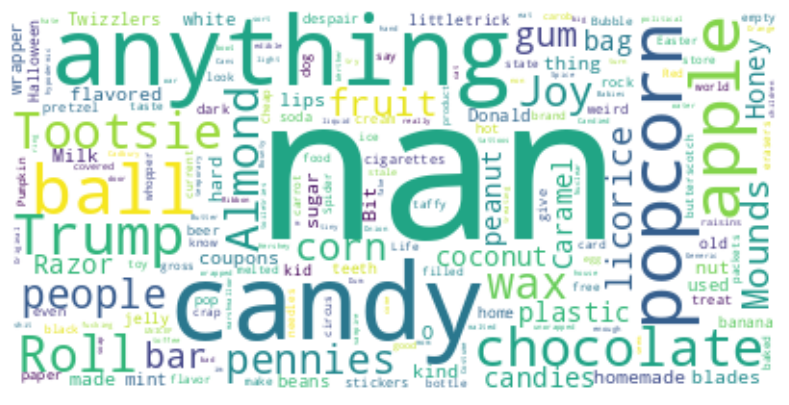

In [181]:
col = df['Q8: DESPAIR OTHER'].dropna()
text = " ".join(cat for cat in col)

word_cloud = WordCloud(collocations= False, background_color='white').generate(text)

plt.axis("off")
plt.imshow(word_cloud, interpolation= 'bilinear')
plt.show()

### **Cleaning candy columns**

In [182]:
candy= [x for x in df.columns if 'Q6' in str(x)]
data = pd.DataFrame(df[candy])
data

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,...,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,...,MEH,MEH,JOY,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,MEH
2456,MEH,DESPAIR,JOY,NaN,NaN,NaN,NaN,DESPAIR,DESPAIR,JOY,...,MEH,MEH,DESPAIR,JOY,NaN,NaN,JOY,DESPAIR,MEH,JOY
2457,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,...,JOY,JOY,MEH,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH
2458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
data.isnull().sum()/len(data)

Q6 | 100 Grand Bar                                                                        0.303659
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    0.298374
Q6 | Any full-sized candy bar                                                             0.273171
Q6 | Black Jacks                                                                          0.389431
Q6 | Bonkers (the candy)                                                                  0.403252
                                                                                            ...   
Q6 | Vicodin                                                                              0.320732
Q6 | Whatchamacallit Bars                                                                 0.334553
Q6 | White Bread                                                                          0.307724
Q6 | Whole Wheat anything                                                                 0.303659
Q6 | York 

In [184]:
data.fillna('other',inplace=True)

## I will transform the data to another type by using points system which counts the total value for each candy to sort them and choose the most popular candy

1.   Joy= 1 point
2.   despair= -1 point
3.   meh= 0 point
4.   other = 0 point

In [185]:
candy_data = data.replace(['JOY','DESPAIR','MEH','other'],[1,-1,0,0])
candy_data.head()

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,...,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,-1,1,0,-1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,-1,-1,-1,-1,-1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,-1,1,0,0,-1,0,-1,-1,0,...,-1,1,0,1,-1,1,1,-1,-1,-1
4,1,-1,1,-1,0,-1,0,-1,-1,0,...,1,1,-1,1,0,1,1,-1,-1,1


In [186]:
candy_score_list = []
for i in candy_data.columns:
    candy_score = candy_data[i].sum()/candy_data[i].nunique()
    candy_score_list.append(candy_score)
scores_table = list(zip(list(candy_data.columns), candy_score_list))
candy_sys = pd.DataFrame(scores_table,columns=['candy name', 'candy score',])
candy_sys['candy name']=candy_sys['candy name'].apply(lambda z : z.strip('Q6 | '))
candy_sys.sort_values('candy score',ascending=False,inplace=True)
candy_sys.reset_index(inplace = True, drop = True)
candy_sys

,candy name,candy score
0,Any full-sized candy bar,514.000000
1,Reese’s Peanut Butter Cups,467.666667
2,Kit Kat,465.000000
3,"Cash, or other forms of legal tender",458.000000
4,Twix,447.333333
...,...,...
98,Dental paraphenalia,-447.333333
99,Real Housewives of Orange County Season 9 Blue...,-463.000000
100,White Bread,-470.333333
101,Gum from baseball cards,-472.666667


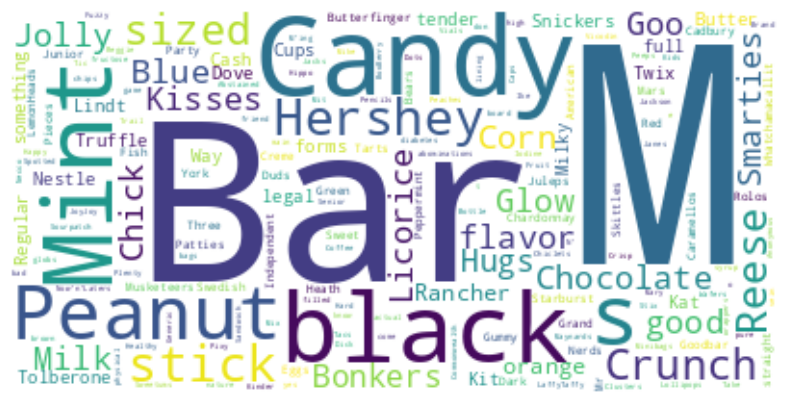

In [187]:
col = candy_sys['candy name']
text = " ".join(cat for cat in col)

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

plt.axis("off")
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

In [188]:
m=361.000000
best_candy=candy_sys[['candy name','candy score']]
best_candy=best_candy [best_candy ['candy score'] > m]
best_candy.reset_index(inplace = True, drop = True)
best_candy

,candy name,candy score
0,Any full-sized candy bar,514.000000
1,Reese’s Peanut Butter Cups,467.666667
2,Kit Kat,465.000000
3,"Cash, or other forms of legal tender",458.000000
4,Twix,447.333333
5,Snickers,440.000000
6,Tolberone something or other,412.000000
7,Lindt Truffle,393.000000
8,Peanut M&M’s,390.000000
9,Nestle Crunch,362.000000


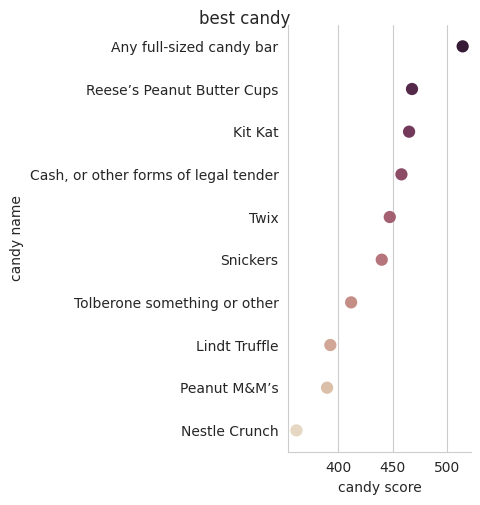

In [189]:
g = sns.catplot(y='candy name',x='candy score',data=best_candy,kind="point",palette="ch:.25_r")
g.fig.suptitle("best candy",y=1)
plt.show()

Any full-sized candy bar is the most loved candy

In [190]:
m=-354.000000
worst_candy=candy_sys[['candy name','candy score']]
worst_candy=worst_candy [worst_candy ['candy score'] < m]
worst_candy.sort_values('candy score',ascending=False,inplace=True)
worst_candy.reset_index(inplace = True, drop = True)
worst_candy

,candy name,candy score
0,Those odd marshmallow circus peanut things,-354.333333
1,Creepy Religious comics/Chick Tracts,-386.666667
2,Whole Wheat anything,-390.666667
3,Candy that is clearly just the stuff given out...,-428.666667
4,Kale smoothie,-442.333333
5,Dental paraphenalia,-447.333333
6,Real Housewives of Orange County Season 9 Blue...,-463.000000
7,White Bread,-470.333333
8,Gum from baseball cards,-472.666667
9,Broken glow stick,-533.666667


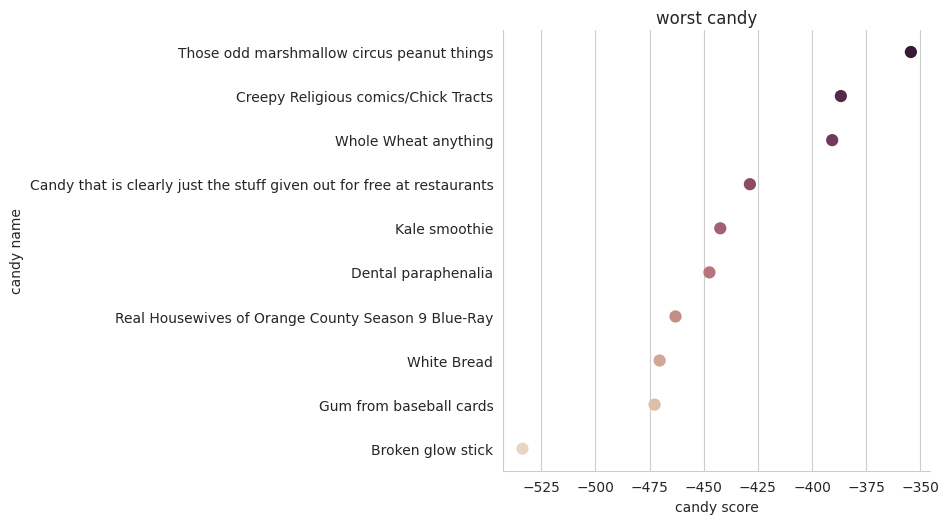

In [191]:
g = sns.catplot(y='candy name',x='candy score',data=worst_candy,kind="point",palette="ch:.25_r")
g.fig.suptitle("worst candy",y=1)
plt.show()

Broken glow stick is the most hated candy

# More visualizations

In [192]:
train=df[['going out','media','dress','day']]
train

,going out,media,dress,day
0,Maybe,No answer,Other Colors,Other
1,No,Science,White and gold,Sunday
2,Maybe,No answer,Other Colors,Other
3,No,Science,White and gold,Sunday
4,No,Science,White and gold,Friday
...,...,...,...,...
2455,No,No answer,White and gold,Friday
2456,No,Science,Blue and black,Friday
2457,No,Science,Blue and black,Friday
2458,No,No answer,Other Colors,Other


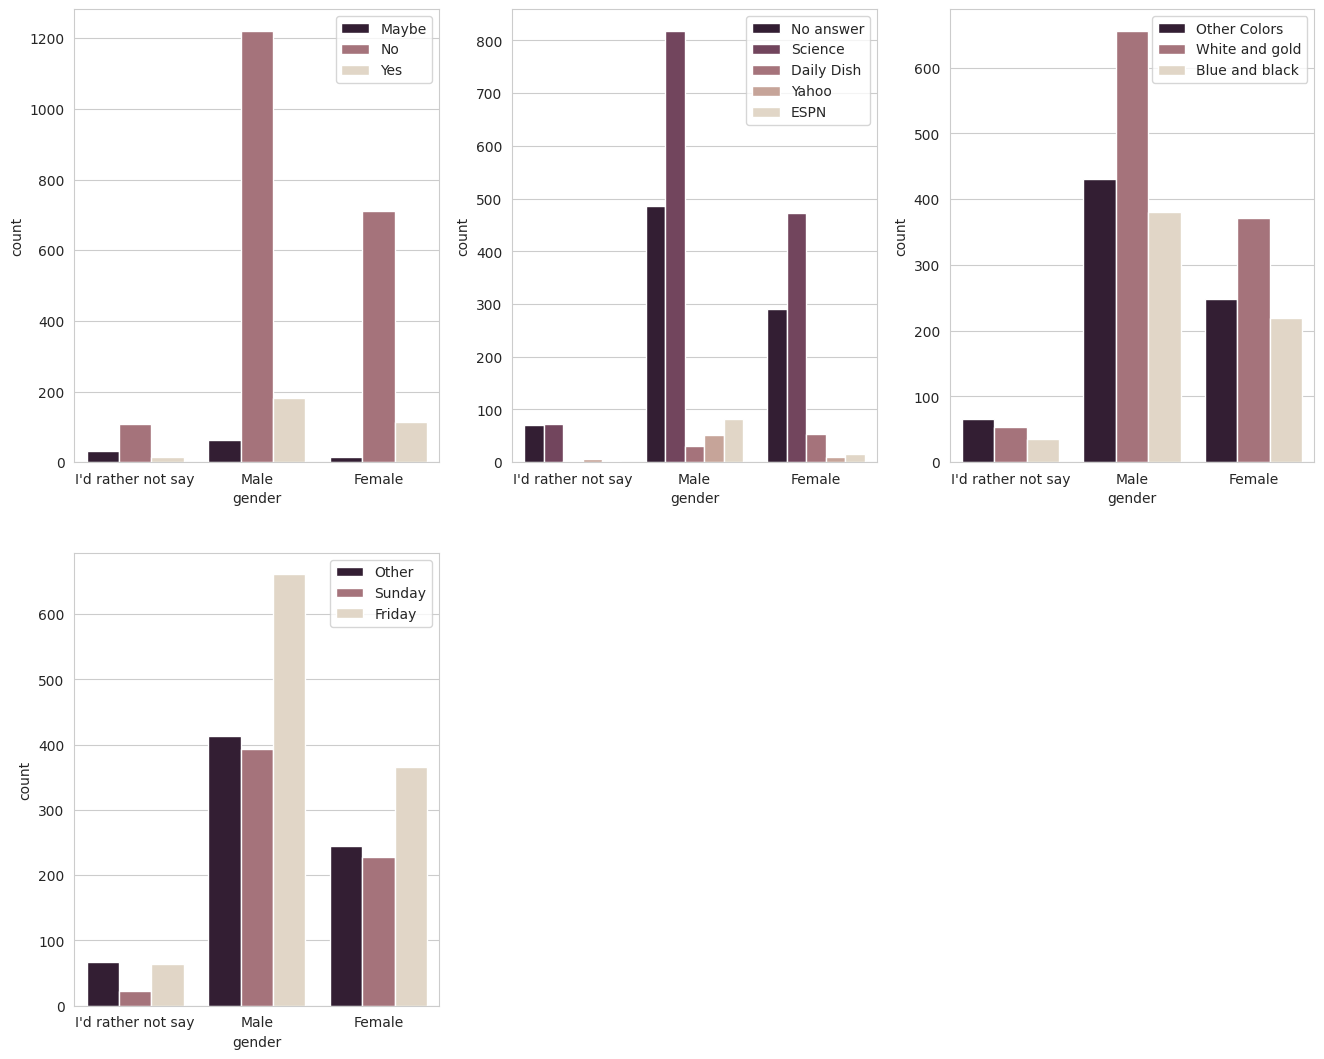

In [193]:
fig = plt.figure(figsize=(16,20))

counter = 0

for i in train.columns:
    if train[i].dtype == 'object':
        sub = fig.add_subplot(3,3,counter+1)
        g = sns.countplot(x='gender',hue=i,data=df,palette="ch:.25_r")
        g.legend(fontsize=10)
        counter = counter + 1

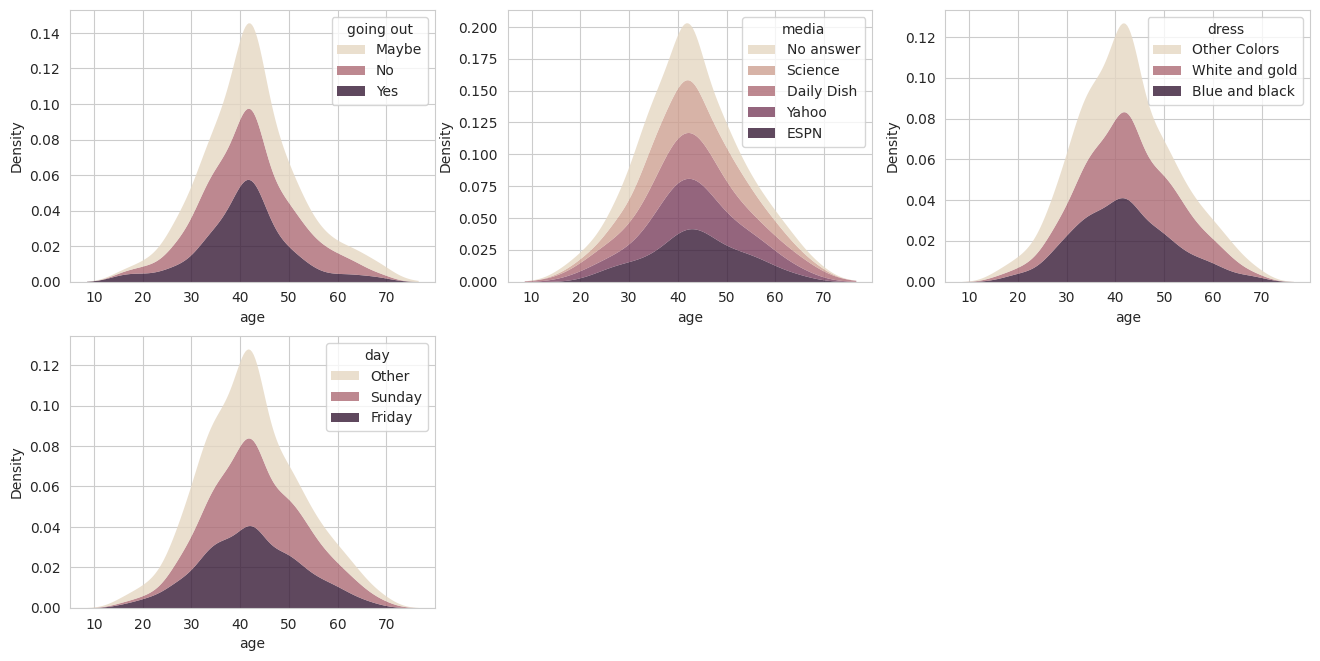

In [194]:
fig = plt.figure(figsize=(16,12))

counter = 0

for i in train.columns:
    if train[i].dtype == 'object':
        sub = fig.add_subplot(3,3,counter+1)
        g = sns.kdeplot(data = df, x = "age",hue = i,palette="ch:.25",multiple="stack",fill=True, common_norm=False,alpha=.8, linewidth=0,)
    
        counter = counter + 1

In [195]:
candy_sys['gender']=df[['gender']]
candy_sys['age']=df[['age']]
candy_sys['country']=df[['country']]
candy_sys

,candy name,candy score,gender,age,country
0,Any full-sized candy bar,514.000000,I'd rather not say,42,Other
1,Reese’s Peanut Butter Cups,467.666667,Male,44,USA
2,Kit Kat,465.000000,Male,49,USA
3,"Cash, or other forms of legal tender",458.000000,Male,40,USA
4,Twix,447.333333,Male,23,USA
...,...,...,...,...,...
98,Dental paraphenalia,-447.333333,Female,35,USA
99,Real Housewives of Orange County Season 9 Blue...,-463.000000,Female,44,USA
100,White Bread,-470.333333,I'd rather not say,42,Other
101,Gum from baseball cards,-472.666667,Male,44,USA


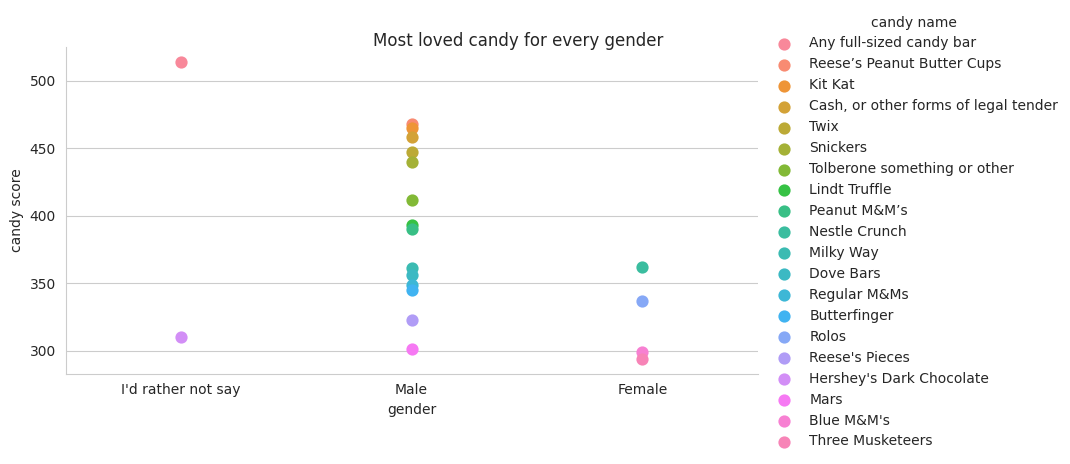

In [196]:
g = sns.catplot(x='gender',y='candy score',hue='candy name',data =candy_sys.sort_values(by = 'candy score', ascending = False).head(20),kind="point", height=4, aspect=2)
g.fig.suptitle("Most loved candy for every gender",y=1)
plt.show()

Reese's Peanut Butter Cups and Kit Kat are most preferred by Males

Nestle Crunch is preferred by Females

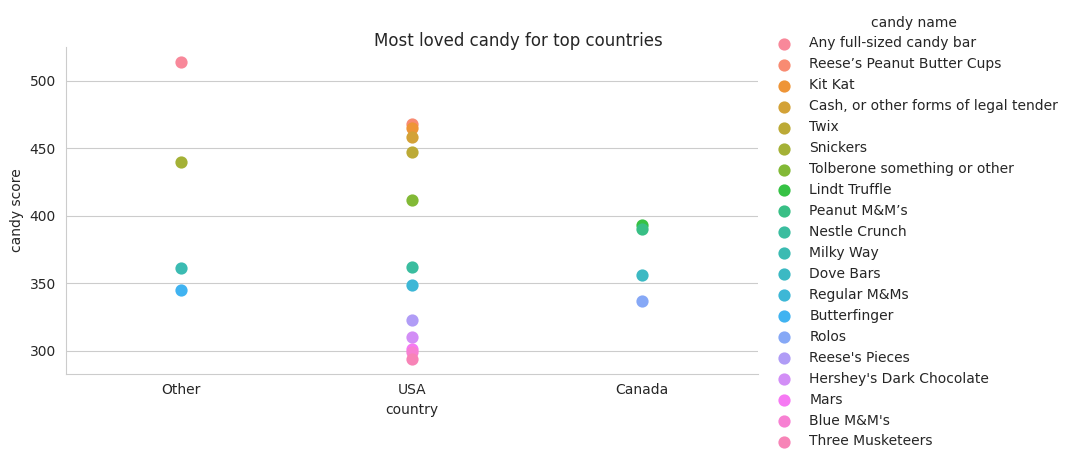

In [197]:
g = sns.catplot(x='country',y='candy score',hue='candy name',data =candy_sys.sort_values(by = 'candy score', ascending = False).head(20),kind="point", height=4, aspect=2)
g.fig.suptitle("Most loved candy for top countries",y=1)
plt.show()

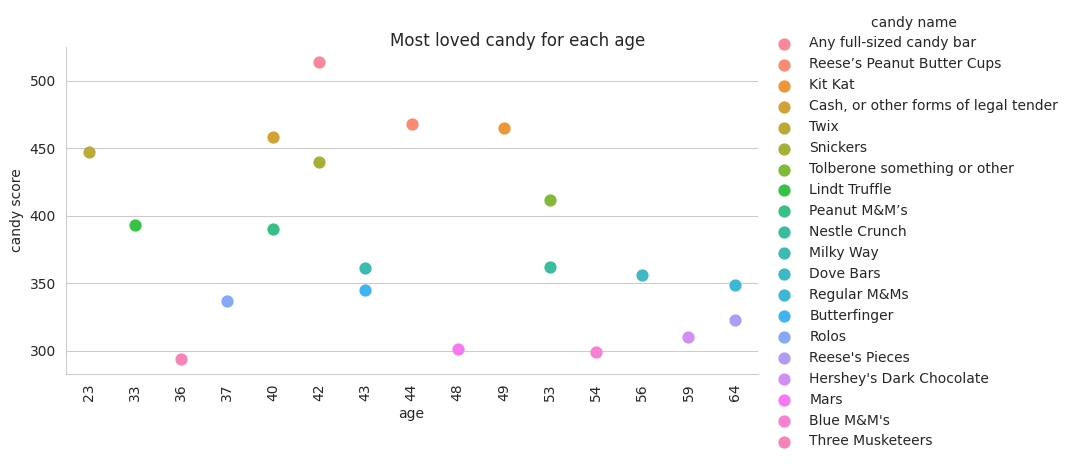

In [198]:
g = sns.catplot(x='age',y='candy score',hue='candy name',data =candy_sys.sort_values(by = 'candy score', ascending = False).head(20),kind="point", height=4, aspect=2)
g.fig.suptitle("Most loved candy for each age",y=1)
plt.xticks(rotation=90)
plt.show()

# Answering EDA questions

1-Most people aren't going out

2-Science is the most likely website to be checked out

3-The most gender is for males

4-Mean age is 42

5-Most people are from USA

6-Most popular candy is the full-sized candy bar

7-least popular candy is the Broken glow stick candy

8-Most people prefers Friday

9-Most people saw the dress White and gold

# Summary :

### 1-I imputed the NaN values, changed the column names, wrong data type and wrong range of values
### 2-I used pd.to_numeric to convert to numbers and the rows that was not able to convert became NaN then float then int
### 3-I created new dataframe for candy to clean it and get useful info, i also made new df to know the most and least popular candy
### 4-state column had too much nuique values so i dropped it
### 5-Using fuzzy_wuzzy to remove mismatch country names
### 6-I created new df for media to know the most popular website